In [6]:
library("tidyverse")
library("sf")
library("raster")
library("leaflet")
library("htmlwidgets")
library("IRdisplay")


although coordinates are longitude/latitude, st_union assumes that they are planar

Warning message:
"attribute variables are assumed to be spatially constant throughout all geometries"


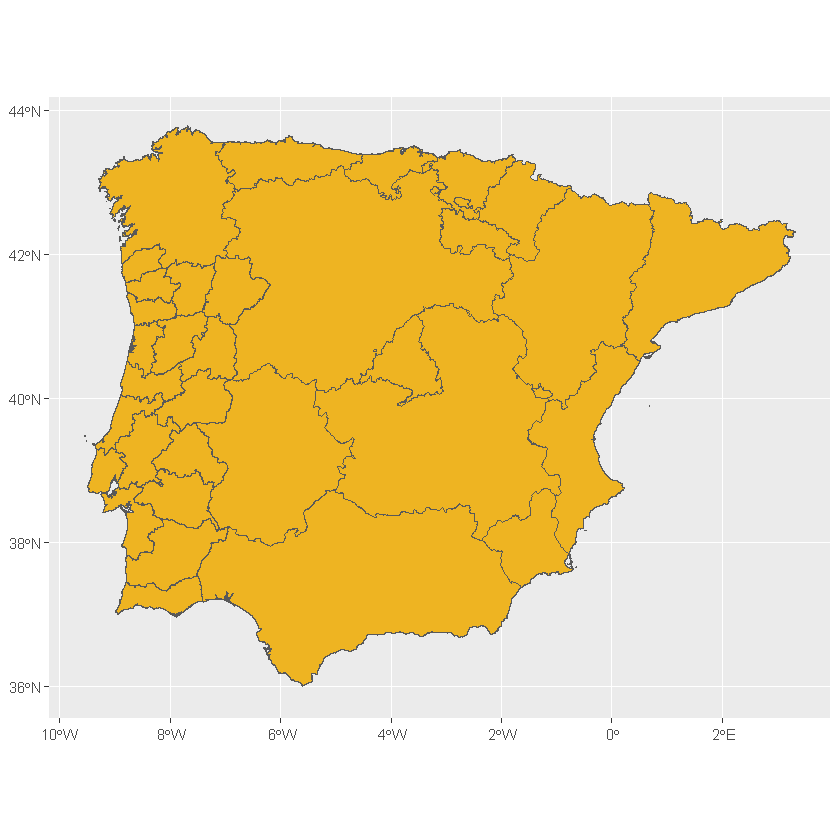

In [2]:
esp <- getData(country = "ESP", level = 1)
esp <- esp %>% st_as_sf() %>% filter(!NAME_1 %in% c("Islas Canarias", "Islas Baleares", "Ceuta y Melilla"))
por <- getData(country = "PRT", level = 1)
por <- por %>% st_as_sf() %>% filter(!NAME_1 %in% c("Azores", "Madeira"))
IP_vector <- st_union(esp, por)
ggplot(IP_vector)+
    geom_sf(fill='goldenrod2')

although coordinates are longitude/latitude, st_union assumes that they are planar



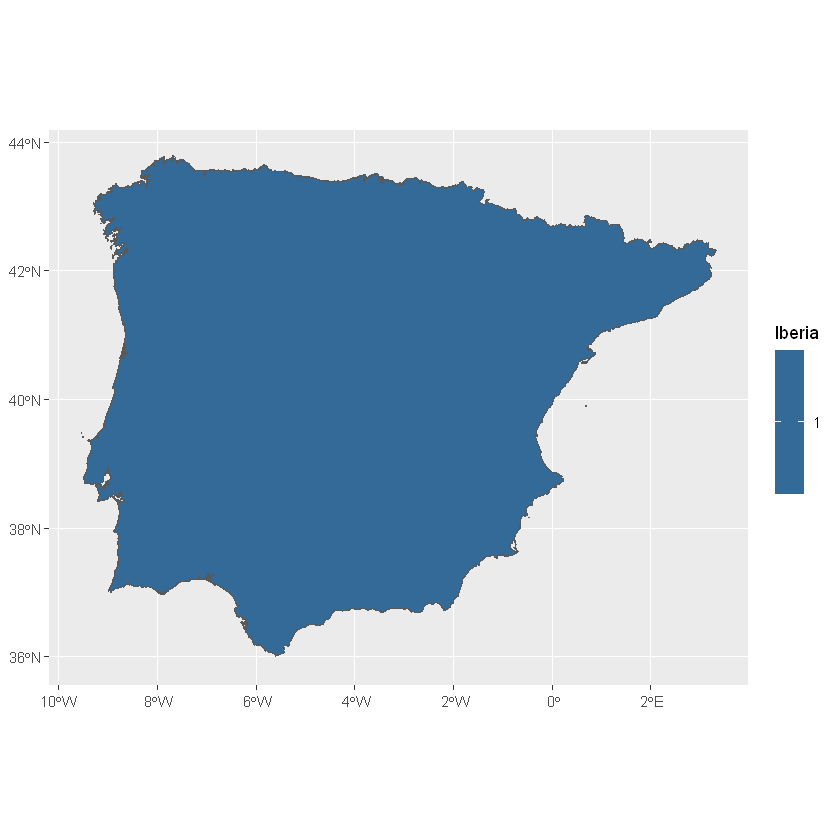

In [3]:
IP_vector_clean <- IP_vector %>% mutate("Iberia" = 1) %>% group_by(Iberia) %>% summarise()
ggplot(IP_vector_clean)+
    geom_sf(aes(fill=Iberia))

In [4]:
outline <- IP_vector_clean %>% st_cast("MULTILINESTRING")

In [5]:
gen_raster <- function(res, mask){
            rs <- getData('worldclim', var='bio', res=res)
            rs_f <- rs[[1]] %>% mask(mask) %>% crop(mask)
            rs_f <- rs_f/10
    return(rs_f)
    
    
}

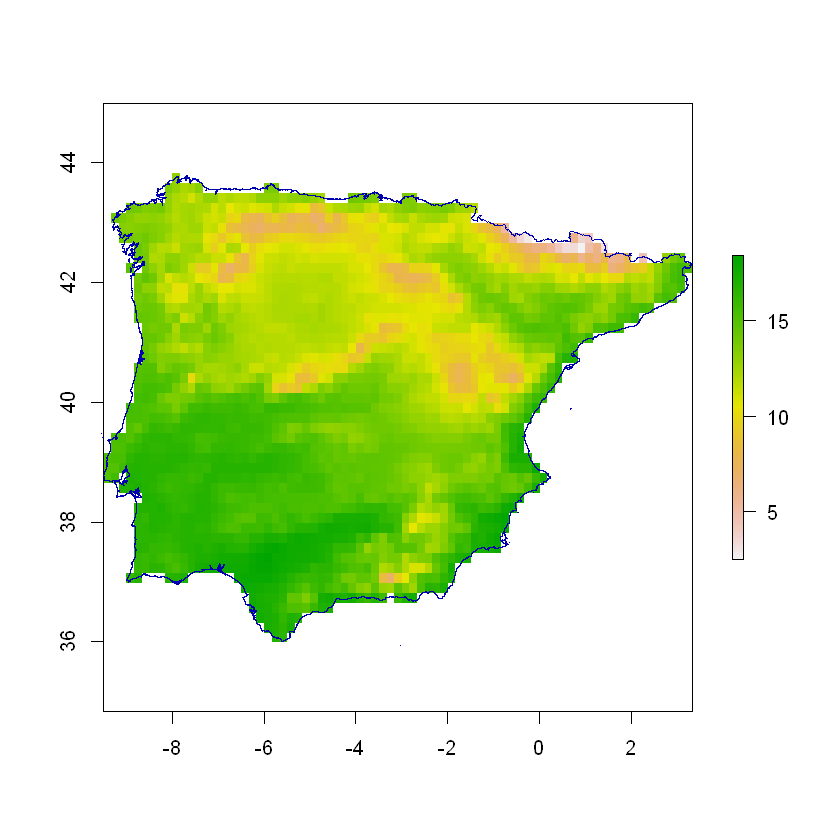

In [7]:
IP_10 <- gen_raster(res=10, mask=IP_vector_clean)
plot(IP_10)
plot(outline, add=T)

In [8]:
IP_10_df <- as.data.frame(IP_10, xy=T, na.rm=T)
head(IP_10_df)

,x,y,bio1
,<dbl>,<dbl>,<dbl>
10,-7.916667,43.75000,13.1
86,-8.083333,43.58333,13.5
87,-7.916667,43.58333,12.9
88,-7.750000,43.58333,12.2
89,-7.583333,43.58333,12.4
90,-7.416667,43.58333,13.2


In [9]:
minmax <- c((max(IP_10_df$x) + min(IP_10_df$x))/2, (max(IP_10_df$y) + min(IP_10_df$y))/2) %>% round(2)

minmax

[1] -3.08 39.92

In [23]:
map <- leaflet() %>%
  addTiles() %>%
  addMarkers(lng=minmax[1], lat=minmax[2], popup="Centro de la Península (20x20km; min-max)") %>%
  setView(lng=minmax[1], lat=minmax[2], zoom=6)

saveWidget(map, 'demo.html', selfcontained = TRUE)
display_html('<iframe src="demo.html" width="700" height ="450"></iframe>')

In [47]:
mediana_10 <- c(median(IP_10_df$x), median(IP_10_df$y)) %>% round(3)
mediana_10

[1] -4.417 40.417

In [48]:
map <- leaflet() %>%
  addTiles() %>%
  addMarkers(lng=mediana_10[1], lat=mediana_10[2], popup="Centro de la Península (20x20km; mediana") %>%
  setView(lng=mediana_10[1], lat=mediana_10[2], zoom=6)

saveWidget(map, 'demo.html', selfcontained = TRUE)
display_html('<iframe src="demo.html" width="700" height ="450"></iframe>')

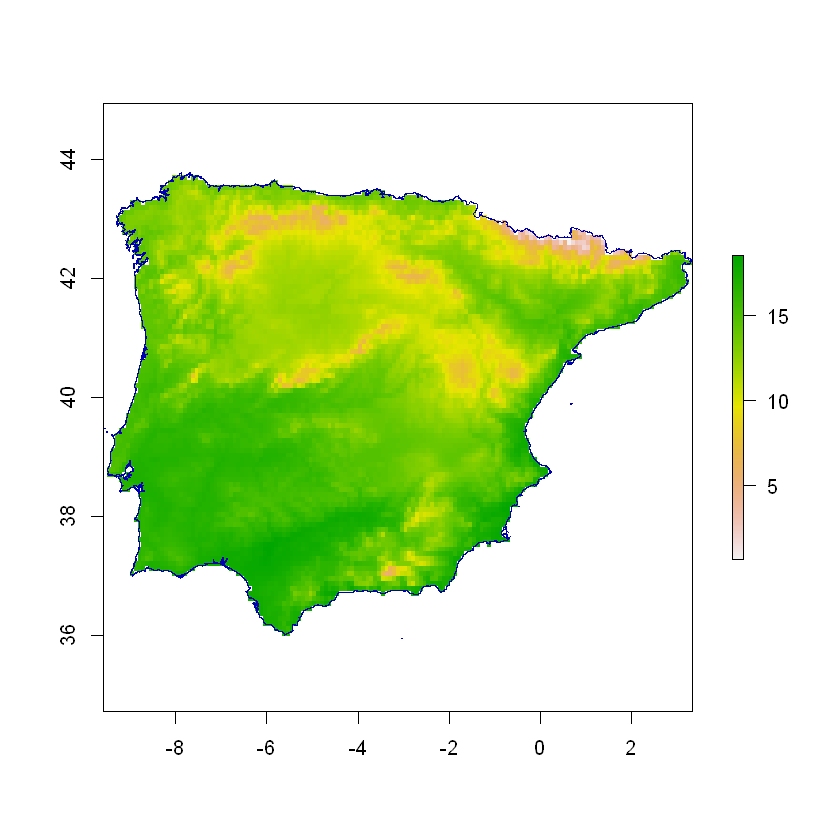

In [25]:
IP_5 <- gen_raster(res=5, mask=IP_vector_clean)
plot(IP_5)
plot(outline, add=T)

In [49]:
df <- as.data.frame(IP_5, xy=T, na.rm=T)
mediana_5 <- c(median(df$x), median(df$y)) %>% round(3)
map <- leaflet() %>%
  addTiles() %>%
  addMarkers(lng=mediana_5[1], lat=mediana_5[2], popup="Centro de la Península (MEDIANA a 10x10km") %>%
  setView(lng=mediana_5[1], lat=mediana_5[2], zoom=6)

saveWidget(map, 'demo.html', selfcontained = TRUE)
display_html('<iframe src="demo.html" width="700" height ="450"></iframe>')

In [52]:
IP_2.5 <- gen_raster(res=2.5, mask=IP_vector_clean)
df_2.5 <- as.data.frame(IP_2.5, xy=T, na.rm=T)


In [53]:
mediana_2.5 <- c(median(df$x), median(df$y)) %>% round(3)
map <- leaflet() %>%
  addTiles() %>%
  addMarkers(lng=mediana_2.5[1], lat=mediana_2.5[2], popup="Centro de la Península (MEDIANA a 5x5km)") %>%
  setView(lng=mediana_2.5[1], lat=mediana_2.5[2], zoom=7)

saveWidget(map, 'demo.html', selfcontained = TRUE)
display_html('<iframe src="demo.html" width="700" height ="450"></iframe>')

In [59]:
cerro <- data.frame("x"=40.308, "y"=-3.684)

In [70]:
map <- leaflet() %>%
  addTiles() %>%
  addMarkers(lng=mediana_10[1], lat=mediana_10[2], popup="Centro de la Península (MEDIANA a 20x20km)") %>%
  addMarkers(lng=mediana_5[1], lat=mediana_5[2], popup="Centro de la Península (MEDIANA a 10x10km)") %>%
  addMarkers(lng=mediana_2.5[1], lat=mediana_2.5[2], popup="Centro de la Península (MEDIANA a 5x5km)") %>%
  addCircleMarkers(lng=-3.684,lat=40.308, radius=5, color='blue') %>%
  addCircleMarkers(lng=-3.699,lat=40.242, radius=5, color='green') %>%
  setView(lng=mediana_2.5[1], lat=mediana_2.5[2], zoom=8)

saveWidget(map, 'demo.html', selfcontained = TRUE)
display_html('<iframe src="demo.html" width="700" height ="450"></iframe>')

In [72]:
IP_vector_clean_m <- st_transform(IP_vector_clean, crs = 3857)